$$ 
\Large \underline{\textbf{Problema 5}}
$$

El agua de un lago de zonas templadas, al igual que el líquido en un reactor de procesos químicos, está térmicamente estratificada. Cerca de la superficie el agua es tibia y liviana (epilimnion) y en el fondo más fría y densa (hipolimnion). Ambas capas estan separadas, aproximadamente, por un plano conocido por thermocline, donde la derivada segunda de la temperatura respecto de la profundidad se hace cero (o la derivada primera tiene su máximo). A esa profundidad el flujo de calor de la superficie al fondo de la capa se puede calcular con la ley de Fourier,

$$ \large
J=-k\frac{dT}{dz}
$$

Dados los datos de la tabla siguiente, correspondientes a la temperatura del líquido de un reactor en función de la profundidad usando el método de splines. Encuentre la posición aproximada de la thermocline y calcule el flujo de calor a través de la interfaz (tome $\text{k = 0.01 cal/(s cm °C)}$)

$$ 
\begin{equation}
\begin{matrix}
z(m) & 0 & 0.5 & 1.0 & 1.5 & 2.0 & 2.5 & 3.0\\
T(°C) & 70 & 68 & 55 & 22 & 13 & 11 & 10
\end{matrix}
\end{equation}\ 
$$

In [1]:
import Tools as tl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
S = np.transpose(np.loadtxt('Datos_P5.txt', unpack=True))
# se forman dos vectores fila con los datos correspondientes a ese archivo

Text(0.5, 1.0, 'Mediciones')

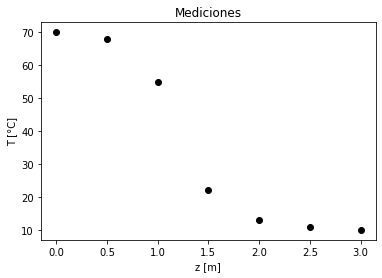

In [3]:
plt.plot(S[:, 0], S[:, 1], 'ok')
plt.xlabel('z [m]')
plt.ylabel('T [°C]')
plt.title('Mediciones')

Elijo r0 y rn = 0 como las 2 condiciones restantes para poder resolver la spline cúbica
z = 1 para indicar que las condiciones corresponden a los valores de las derivadas primeras en los extremos
'p' nos da la cantidad de puntos que se generan para cada una de las curvas (mayor 'p' mayor precisión)

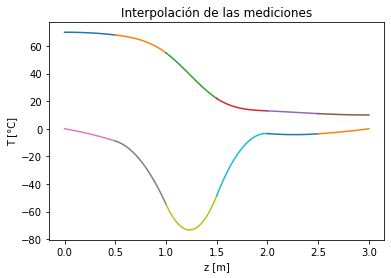

In [4]:
r0 = 0
rn = 0
z = 1
coef = np.array(tl.spline3(S, z, r0, rn))
plt.title('Interpolación de las mediciones')
plt.xlabel('z [m]')
plt.ylabel('T [°C]')
xd, fd, ploteo = tl.grspline3(S, coef, 70, 1)

Grafico todas las curvas correspondientes con la función que cree llamada grspline3

Cómo fd es una lista de listas, pasamos a armar un hcat, donde todos los elementos pasan a ser parte de una única lista

In [5]:
posmin = fd.argmin()  # Pos del mínimo de la función derivada

In [6]:
print(posmin)

172


In [7]:
magmin = np.hstack(fd)[172]
xmin = np.hstack(xd)[172]

In [8]:
print(magmin, xmin)

-73.3269158063109 1.2318840579710144


$
$

$
\LARGE \textbf
{
Otra manera de graficar sin usar grspline3 y encontrar el mínimo
}
$

In [9]:
h = np.diff(S[:, 0])  # np.diff calcula la diferencia entre cada elemento

In [10]:
X = [np.linspace(xi, xi+9*hi/10, 9) for xi, hi in zip(S[:-1, 0], h)]

In [11]:
feval = [np.polyval(coefi, XI-Si) for coefi, XI, Si in zip(coef.transpose(), X, S[:-1, 0])]

np.polyval se encarga de evaluar polinomios de valores específicos. Los coef se deben colocar en orden decreciente de potencias.

[[<matplotlib.lines.Line2D at 0x20047c6f760>],

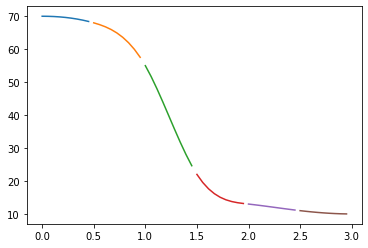

In [12]:
[plt.plot(Xi, fevali) for Xi, fevali in zip(X, feval)]

In [13]:
feval = np.hstack(feval)
X = np.hstack(X)

In [14]:
fderiv = np.gradient(feval, X)

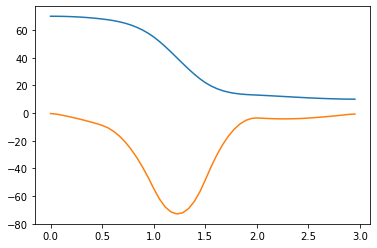

In [15]:
plt.plot(X, feval)
plt.plot(X, fderiv)

In [16]:
np.min(fderiv)

-72.94441346153843